# Southeastern Bay of Biscay
Dataset of macrobenthic species, organic matter content and grain-size distribution in surficial seafloor sediments in outer continental shelf, pockmark fields and Capbreton canyon tributaries in the southeastern Bay of Biscay

https://www.sciencedirect.com/science/article/pii/S2352340921007460#sec0001

https://data.mendeley.com/datasets/hvnzwfvsm7/2

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os

# Define the new folder path
new_folder_path = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset'

# Create the new folder
os.makedirs(new_folder_path, exist_ok=True)


In [4]:
import requests

# Define the URL and the local path to save the file
url = 'https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/hvnzwfvsm7-2.zip'
local_path = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/hvnzwfvsm7-2.zip'

# Download the file
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

# Save the file
with open(local_path, 'wb') as file:
    file.write(response.content)

print("Download complete!")


Download complete!


In [5]:
import zipfile
import os

# Define the path to the ZIP file and the extraction directory
zip_path = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/hvnzwfvsm7-2.zip'
extract_path = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/'

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")

# List the contents of the extracted folder
extracted_files = os.listdir(extract_path)
print("Extracted files:", extracted_files)


Extraction complete!
Extracted files: ['hvnzwfvsm7-2.zip', 'SedimentCharacteristics.xlsx', 'Macrobenthos2019.xlsx', 'Macrobenthos2010.xlsx', 'Macrobenthos2011.xlsx', 'Macrobenthos2013.xlsx', 'Macrobenthos2012.xlsx', 'Macrobenthos2020.xlsx']


In [6]:
import pandas as pd

# File paths
files = {
    '2010': '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/Macrobenthos2010.xlsx',
    '2011': '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/Macrobenthos2011.xlsx',
    '2012': '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/Macrobenthos2012.xlsx',
    '2013': '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/Macrobenthos2013.xlsx',
    '2019': '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/Macrobenthos2019.xlsx',
    '2020': '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/Macrobenthos2020.xlsx',
    'SedimentCharacteristics': '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/SedimentCharacteristics.xlsx'
}

# Load datasets
dfs = {year: pd.read_excel(files[year]) for year in files if year != 'SedimentCharacteristics'}
sediment_df = pd.read_excel(files['SedimentCharacteristics'])

# Display the first few rows of each dataset to understand their structure
for year, df in dfs.items():
    print(f"Data for {year}:")
    print(df.head(), "\n")

print("Sediment Characteristics Data:")
print(sediment_df.head())


Data for 2010:
                                          Unnamed: 0  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  World Register of Marine Species. Available fr...   

                                          Unnamed: 1  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  World Register of Marine Species. Available fr...   

                                          Unnamed: 2  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  World Register of Marine Spe

# Analysis

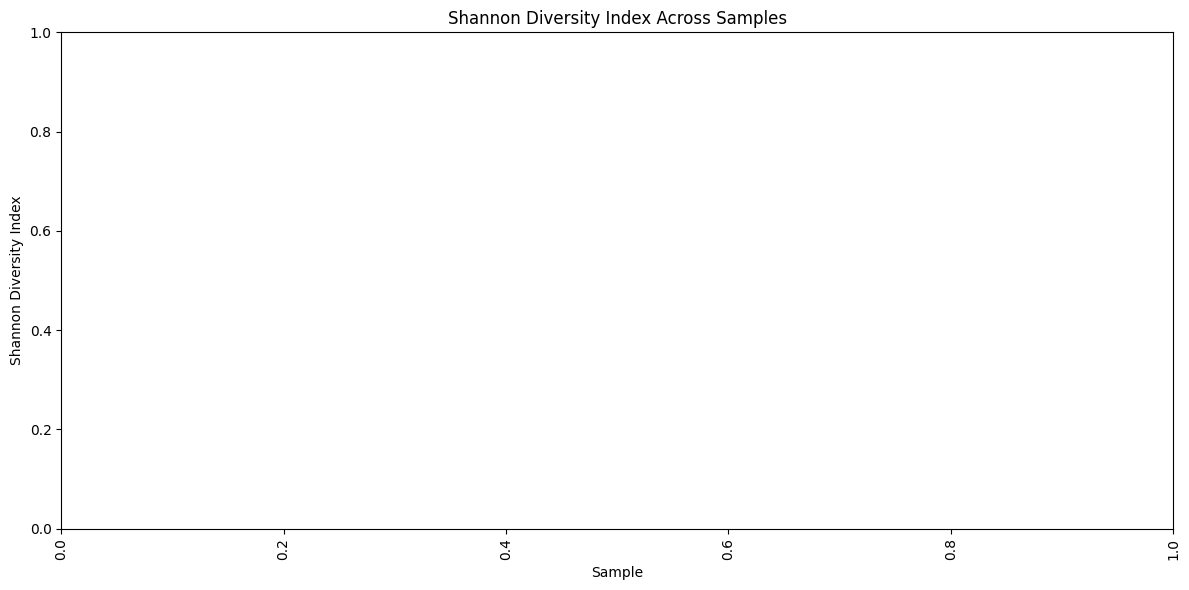

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel('/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/Macrobenthos2019.xlsx')

# Extract columns related to abundance (assuming they follow the pattern 'ind./m2.X')
abundance_columns = [col for col in df.columns if col.startswith('ind./m2')]

# Calculate Shannon Diversity Index for each sample
def shannon_diversity(abundance_series):
    """Calculate Shannon Diversity Index for a given series of abundances."""
    abundance = abundance_series.dropna()
    proportions = abundance / abundance.sum()
    return -(proportions * np.log(proportions)).sum()

# Calculate Shannon Diversity Index for each abundance column
diversity_indices = {}
for column in abundance_columns:
    diversity_indices[column] = shannon_diversity(df[column])

# Convert to DataFrame for plotting
diversity_df = pd.DataFrame(list(diversity_indices.items()), columns=['Sample', 'Shannon Diversity Index'])

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Sample', y='Shannon Diversity Index', data=diversity_df, palette='viridis')
plt.title('Shannon Diversity Index Across Samples')
plt.xlabel('Sample')
plt.ylabel('Shannon Diversity Index')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


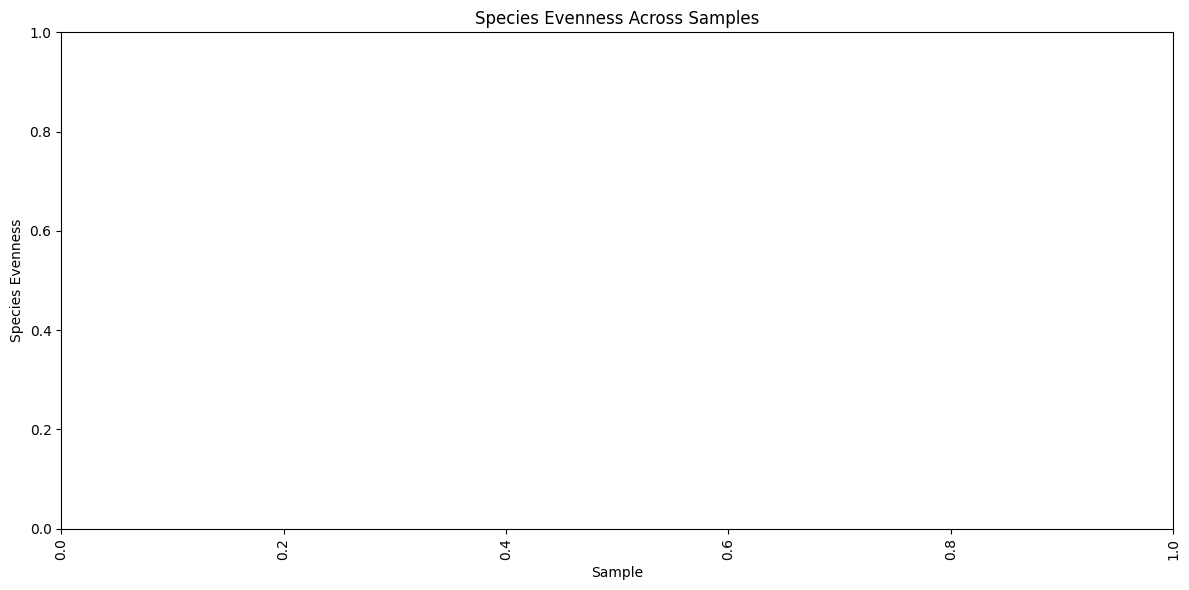

In [8]:
# Calculate Species Richness for each sample
def species_richness(abundance_series):
    """Calculate species richness for a given series of abundances."""
    return abundance_series.dropna().gt(0).sum()

# Calculate Species Richness for each abundance column
richness = {}
for column in abundance_columns:
    richness[column] = species_richness(df[column])

# Convert to DataFrame for plotting
richness_df = pd.DataFrame(list(richness.items()), columns=['Sample', 'Species Richness'])

# Merge with Shannon Diversity Index DataFrame
diversity_df = diversity_df.set_index('Sample').join(pd.DataFrame(richness.items(), columns=['Sample', 'Species Richness']).set_index('Sample'))

# Calculate Species Evenness
diversity_df['Species Evenness'] = diversity_df['Shannon Diversity Index'] / np.log(diversity_df['Species Richness'])

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Sample', y='Species Evenness', data=diversity_df, palette='viridis')
plt.title('Species Evenness Across Samples')
plt.xlabel('Sample')
plt.ylabel('Species Evenness')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Multiple samples

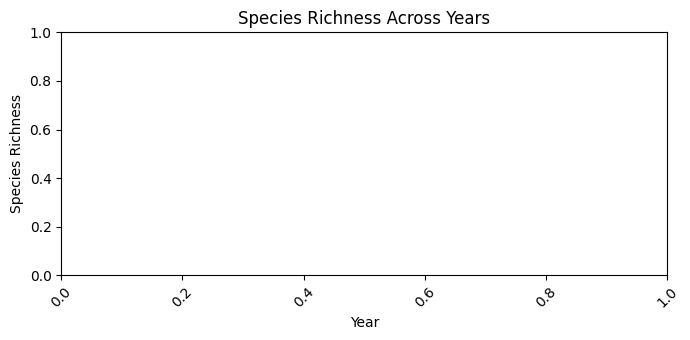

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
file_paths = [
    '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/Macrobenthos2010.xlsx',
    '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/Macrobenthos2011.xlsx',
    '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/Macrobenthos2012.xlsx',
    '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/Macrobenthos2013.xlsx',
    '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/Macrobenthos2019.xlsx',
    '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/Macrobenthos2020.xlsx'
]

# Initialize a DataFrame to store richness results
richness_results = []

# Process each file
for file_path in file_paths:
    # Extract the year from the filename
    year = file_path.split('/')[-1].split('.')[0].split('Macrobenthos')[-1]

    # Load the data
    df = pd.read_excel(file_path)

    # Extract columns related to abundance (assuming they follow the pattern 'ind./m2.X')
    abundance_columns = [col for col in df.columns if col.startswith('ind./m2')]

    # Calculate Species Richness for each sample
    def species_richness(abundance_series):
        """Calculate species richness for a given series of abundances."""
        return abundance_series.dropna().gt(0).sum()

    # Loop through abundance columns and calculate richness
    richness = {}
    for column in abundance_columns:
        richness[column] = species_richness(df[column])

    # Convert the richness dictionary to a DataFrame
    richness_df = pd.DataFrame(list(richness.items()), columns=['Sample', 'Species Richness'])
    richness_df['Year'] = year

    # Append to results
    richness_results.append(richness_df)

# Combine all results into a single DataFrame
combined_richness_df = pd.concat(richness_results)

# Plotting Species Richness across years
plt.figure(figsize=(7, 3.5))
sns.barplot(x='Year', y='Species Richness', data=combined_richness_df, palette='viridis')
plt.title('Species Richness Across Years')
plt.xlabel('Year')
plt.ylabel('Species Richness')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# total abundance per sample

In [10]:
import pandas as pd

# Define file paths
file_paths = [
    '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/Macrobenthos2010.xlsx',
    '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/Macrobenthos2011.xlsx',
    '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/Macrobenthos2012.xlsx',
    '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/Macrobenthos2013.xlsx',
    '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/Macrobenthos2019.xlsx',
    '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/dataset/Macrobenthos2020.xlsx'
]

# Initialize a DataFrame to store total abundances
total_abundance = pd.DataFrame()

# Process each file
for file_path in file_paths:
    # Load the data
    df = pd.read_excel(file_path)

    # Extract species and abundance columns
    species_column = 'Species'
    abundance_columns = [col for col in df.columns if col.startswith('ind./m2')]

    # Create a DataFrame for the current file
    for column in abundance_columns:
        temp_df = df.groupby(species_column)[column].sum().reset_index()
        temp_df['Source'] = file_path.split('/')[-1]
        total_abundance = pd.concat([total_abundance, temp_df], ignore_index=True)

# Aggregate the total abundance across all files
total_abundance_summary = total_abundance.groupby(species_column).agg({'ind./m2': 'sum'}).reset_index()
total_abundance_summary = total_abundance_summary.sort_values(by='ind./m2', ascending=False)

# Display the top 10 most abundant species
print(total_abundance_summary.head(10))


KeyError: 'Species'

# heatmap of abundance

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for species and sample abundances
species_sample_abundance = pd.DataFrame()

for file_path in file_paths:
    df = pd.read_excel(file_path)
    species_column = 'Species'
    abundance_columns = [col for col in df.columns if col.startswith('ind./m2')]

    for column in abundance_columns:
        temp_df = df.groupby(species_column)[column].sum().reset_index()
        temp_df.set_index(species_column, inplace=True)
        temp_df.columns = [file_path.split('/')[-1]]  # Rename column to the file name
        species_sample_abundance = pd.concat([species_sample_abundance, temp_df], axis=1)

# Fill NaNs with 0 for plotting
species_sample_abundance = species_sample_abundance.fillna(0)

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(species_sample_abundance, cmap='viridis', annot=True, fmt='.2f')
plt.title('Abundance of Species Across Samples')
plt.xlabel('Sample')
plt.ylabel('Species')
plt.tight_layout()
plt.show()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1400x1000 with 0 Axes>

# species abundance over time

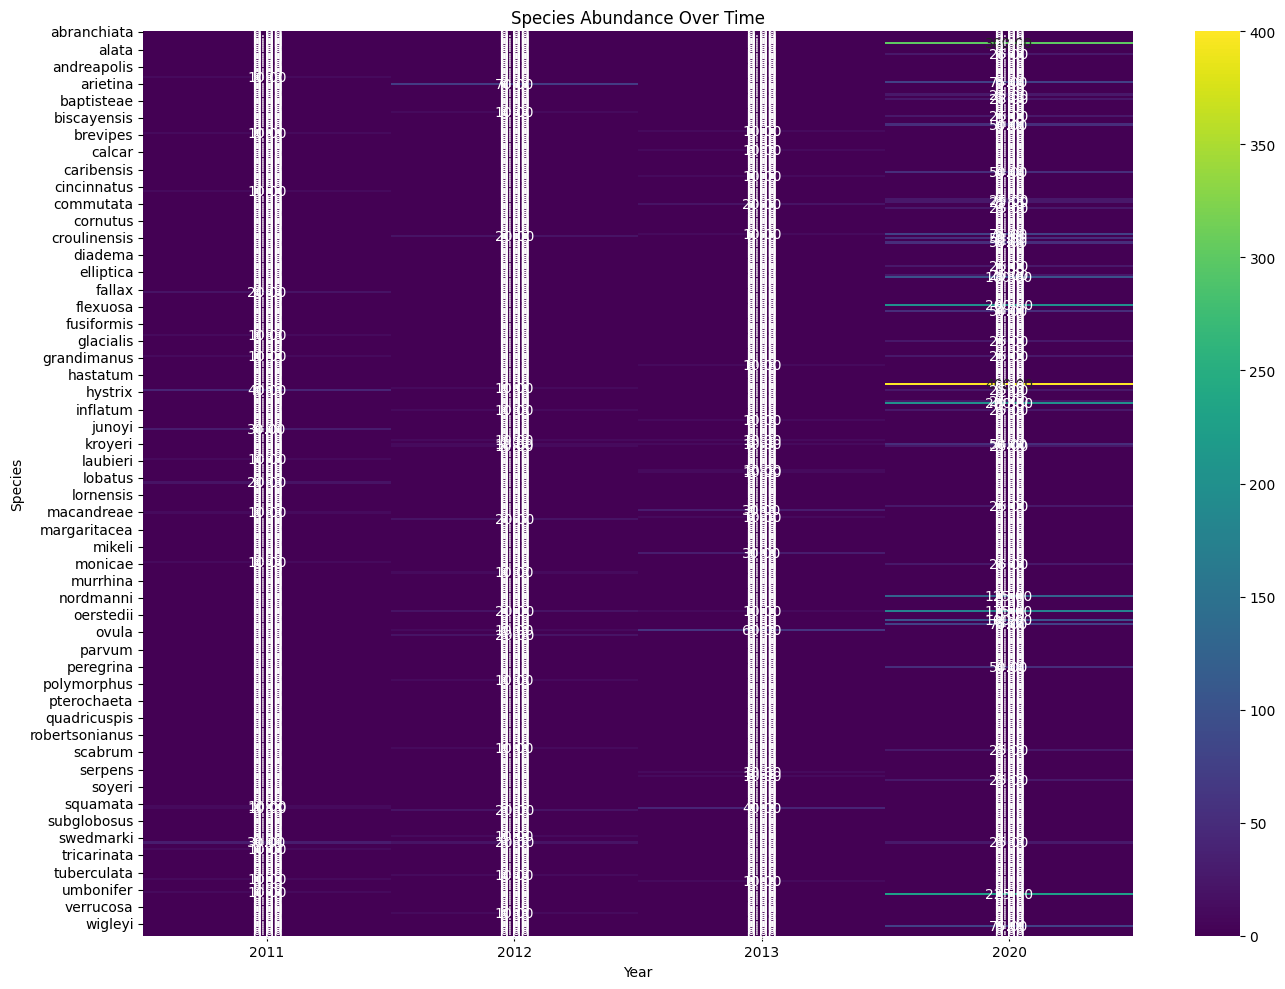

In [45]:
# Initialize a DataFrame to store species abundance over time
species_over_time = pd.DataFrame()

for file_path in file_paths:
    year = file_path.split('/')[-1].split('.')[0].split('Macrobenthos')[-1]
    df = pd.read_excel(file_path)
    species_column = 'Species'
    abundance_columns = [col for col in df.columns if col.startswith('ind./m2')]

    for column in abundance_columns:
        temp_df = df.groupby(species_column)[column].sum().reset_index()
        temp_df['Year'] = year
        species_over_time = pd.concat([species_over_time, temp_df], ignore_index=True)

# Pivot the DataFrame for plotting
pivot_table = species_over_time.pivot_table(index='Species', columns='Year', values='ind./m2', aggfunc='sum', fill_value=0)

# Plot species abundance over time
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='.2f')
plt.title('Species Abundance Over Time')
plt.xlabel('Year')
plt.ylabel('Species')
plt.tight_layout()
plt.show()
